In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import xarray as xr

from rate_model import RateModelWC


#SEED = 112
#np.random.seed(SEED)

# Model params
N = 2
model_par = dict(tau=1, rmax=10, gain_slope=0.5, gain_center=0)
sim_par = {'dt': 0.25, 'nsteps': 100}

In [279]:
w_sigma = 0.1

nmats = 1000
W = w_sigma * (2 * np.random.rand(nmats, N, N) - 1)

L = np.zeros((nmats, N), dtype=np.complex128)
for n in range(nmats):
    Wn = W[n, :, :]
    L[n, :] = np.linalg.eigvals(Wn)

q = np.mean(np.imag(L[:, 0]) != 0)
print(f'Perc. imag.: {q}')

Perc. imag.: 0.309


Text(0, 0.5, 'Im(L1)')

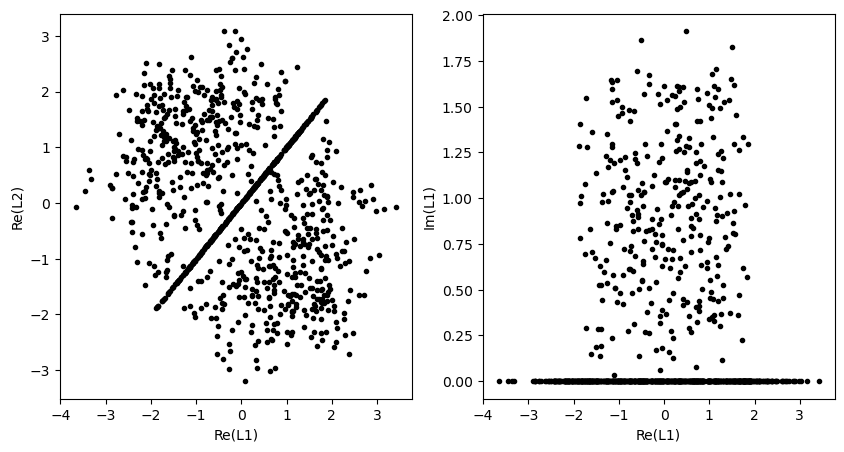

In [253]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
#plt.plot(np.abs(L[:, 0]), np.abs(L[:, 1]), 'k.')
#plt.xlabel('|L1|')
#plt.ylabel('|L2|')
plt.plot(np.real(L[:, 0]), np.real(L[:, 1]), 'k.')
plt.xlabel('Re(L1)')
plt.ylabel('Re(L2)')

plt.subplot(1, 2, 2)
q = np.random.normal(size=(nmats, 2)) * 0.00
plt.plot(np.real(L[:, 0]) + q[:, 0],
            np.abs(np.imag(L[:, 0])) + q[:, 1], 'k.')
plt.xlabel('Re(L1)')
plt.ylabel('Im(L1)')

In [280]:
mets = {
    're_max': np.max(np.real(L), axis=1),
    're_min': np.min(np.real(L), axis=1),
    'abs_max': np.max(np.abs(L), axis=1),
    'abs_min': np.min(np.abs(L), axis=1),
    'imag': np.abs(np.imag(L[:, 0]))
}
mets['abs_ratio'] = mets['abs_max'] / mets['abs_min']


Text(0, 0.5, 'Rate')

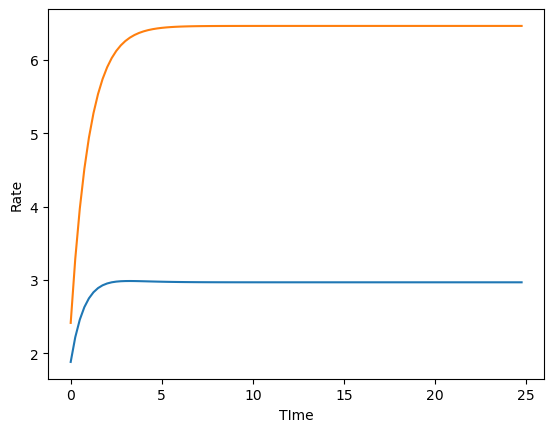

In [295]:
met = 'abs_max'
idx = np.argsort(mets[met])

mask = mets['imag'] > 0
mask = mask[idx]
idx = idx[mask]

W_ = W[idx[-1], :, :]
model = RateModelWC(W_, **model_par)
model.sim_res_type = 'full'

h0 = 1.0 * np.random.randn(N, 1)
r0 = 10 * np.random.rand(N, 1)
R = model.run(h0, r0=r0, **sim_par)
t = R.time.values
R = R.values

plt.figure()
plt.plot(t, R[0, :])
plt.plot(t, R[1, :])
plt.xlabel('TIme')
plt.ylabel('Rate')